<a href="https://colab.research.google.com/github/UmmuHusnul/Assignment-4-PCD/blob/main/Assignment_4_PCD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Assignment 4 PCD**

In [16]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [17]:
from google.colab import files
uploaded = files.upload()

Saving F348G0tb0AA54u-.jpeg to F348G0tb0AA54u-.jpeg


# **GrayScale**

In [18]:
# Baca citra GrayScale
image_path = list(uploaded.keys())[0]
gray = cv2.imread(image_path, 0)

In [19]:
blur = cv2.GaussianBlur(gray, (5,5), 0)

In [20]:
sobelx = cv2.Sobel(blur, cv2.CV_64F, 1, 0, ksize=3)
sobely = cv2.Sobel(blur, cv2.CV_64F, 0, 1, ksize=3)

In [21]:
mag = np.hypot(sobelx, sobely)
mag = mag / np.max(mag) * 255
theta = np.arctan2(sobely, sobelx)

In [22]:
angle = np.rad2deg(theta)
angle[angle < 0] += 180

In [23]:
# Terapkan non-maximum suppression
M, N = gray.shape
nms = np.zeros((M,N), dtype=np.int32)
for i in range(1, M-1):
    for j in range(1, N-1):
        q = 255
        r = 255

        # Tentukan arah tepi
        if (0 <= angle[i,j] < 22.5) or (157.5 <= angle[i,j] <= 180):
            q = mag[i, j+1]
            r = mag[i, j-1]
        elif (22.5 <= angle[i,j] < 67.5):
            q = mag[i+1, j-1]
            r = mag[i-1, j+1]
        elif (67.5 <= angle[i,j] < 112.5):
            q = mag[i+1, j]
            r = mag[i-1, j]
        elif (112.5 <= angle[i,j] < 157.5):
            q = mag[i-1, j-1]
            r = mag[i+1, j+1]

        # Terapkan non-maximum suppression
        if (mag[i,j] >= q) and (mag[i,j] >= r):
            nms[i,j] = mag[i,j]

In [24]:
# Terapkan double thresholding
high_threshold = 0.2 * np.max(nms)
low_threshold = 0.1 * np.max(nms)
strong_edges = (nms > high_threshold)
weak_edges = (nms >= low_threshold) & (nms <= high_threshold)
strong_i, strong_j = np.where(strong_edges)
weak_i, weak_j = np.where(weak_edges)

In [25]:
# Terapkan hysteresis thresholding
final_edges = np.zeros((M,N), dtype=np.int32)
final_edges[strong_i, strong_j] = 255
for i, j in zip(weak_i, weak_j):
    if (final_edges[max(0, i-1):min(M, i+2), max(0, j-1):min(N, j+2)] == 255).any:
        final_edges[i, j] = 255

# **RGB**

In [26]:
# Baca citra RGB
image_path = list(uploaded.keys())[0]
rgb = cv2.imread(image_path)

In [27]:
blur = cv2.GaussianBlur(rgb, (5, 5), 0)

In [28]:
edges = cv2.Canny(blur, 100, 200)

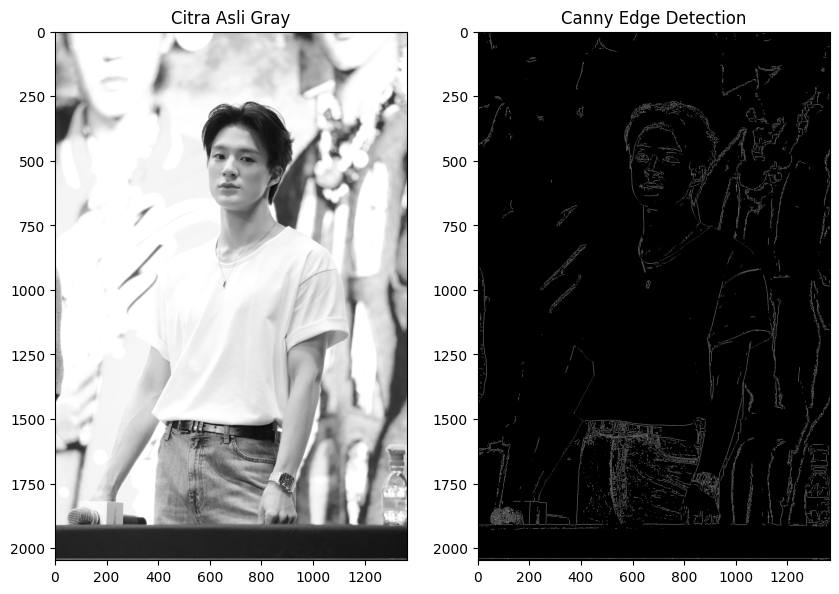

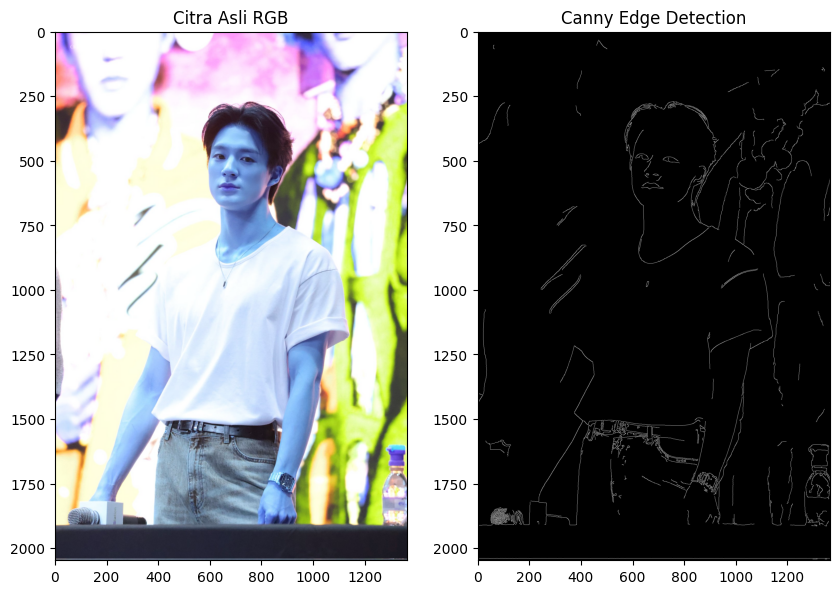

In [29]:
#GrayScale
plt.figure(figsize=(10, 10))
plt.subplot(121)
plt.title('Citra Asli Gray')
plt.imshow(gray, cmap='gray')
plt.subplot(122)
plt.title('Canny Edge Detection')
plt.imshow(final_edges, cmap='gray')
plt.show()

#RGB
plt.figure(figsize=(10, 10))
plt.subplot(121)
plt.title('Citra Asli RGB')
plt.imshow(rgb,cmap='gray')
plt.subplot(122)
plt.title('Canny Edge Detection')
plt.imshow(edges, cmap='gray')
plt.show()